In [7]:
import pandas as pd
import numpy as np
import glob
import re
import random
import types
import multiprocessing
import sys 
sys.path.append("../")
from multiprocessing import Pool
import matplotlib.pyplot as plt
from scipy import interpolate
from tqdm.notebook import tqdm

# io_f, compute_fはコンペのgithubから持ってきたファイル
from src.io_f import read_data_file
import src.compute_f as compute_f
from src.visualize_f import visualize_trajectory


In [2]:
def imports():
    for name, val in globals().items():
        # module imports
        if isinstance(val, types.ModuleType):
            yield name, val
        # functions / callables
        if hasattr(val, '__call__'):
            yield name, val
np.seterr(divide='ignore', invalid='ignore')
noglobal = lambda fn: types.FunctionType(fn.__code__, dict(imports()))

In [3]:
# testで予測するサイトを見てみる
# dictionary used to map the floor codes to the values used in the submission file. 
floor_map = {"B2":-2, "B1":-1, "F1":0, "F2": 1, "F3":2, "F4":3, "F5":4, "F6":5, "F7":6,"F8":7, "F9":8,
             "1F":0, "2F":1, "3F":2, "4F":3, "5F":4, "6F":5, "7F":6, "8F": 7, "9F":8}
            
base_path = '../input/indoor-location-navigation/'
sample_submission = pd.read_csv(base_path + 'sample_submission.csv')
used_buildings = sample_submission['site_path_timestamp'].str.split('_', expand=True)[0].unique()

## サンプルを取得

In [10]:
# 予測対象のサイトのサンプルを取得する

# path_file = "../input/indoor-location-navigation/train/5d27075f03f801723c2e360f/F6/5da835bcae6cfc0006ca81ff.txt"
path_file = "../input/indoor-location-navigation/train/5d27075f03f801723c2e360f/F6/5da84747ae6cfc0006ca8268.txt"

example = read_data_file(path_file)

In [11]:
# jsonデータとpngデータを取得
import json

trajectory = example.waypoint
floor_plan_filename = f'../input/indoor-location-navigation/metadata/{site}/{floor}/floor_image.png'
json_plan_filename = f'../input/indoor-location-navigation/metadata/{site}/{floor}/floor_info.json'

with open(json_plan_filename) as json_file:
    json_data = json.load(json_file)
    
width_meter = json_data["map_info"]["width"]
height_meter = json_data["map_info"]["height"]

# Title
title = "Example of Waypoint"

In [16]:
trajectory[:, 1:]

array([[54.08458 , 74.89516 ],
       [60.38916 , 76.30572 ],
       [65.93068 , 76.943184],
       [65.13287 , 79.75014 ],
       [59.552242, 79.09273 ],
       [54.27711 , 77.128105],
       [54.08458 , 74.89516 ]])

In [19]:
width_meter, height_meter

(87.174732000452, 142.48950770731392)


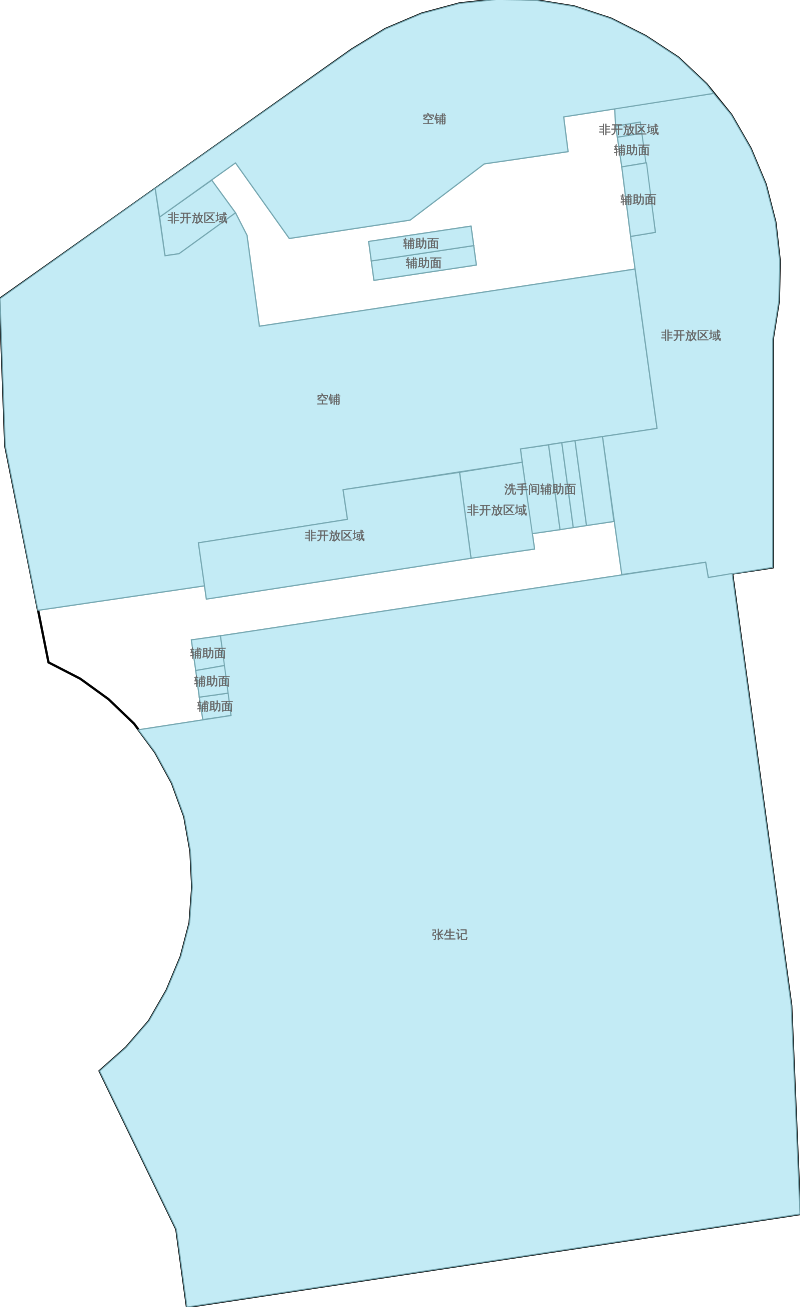


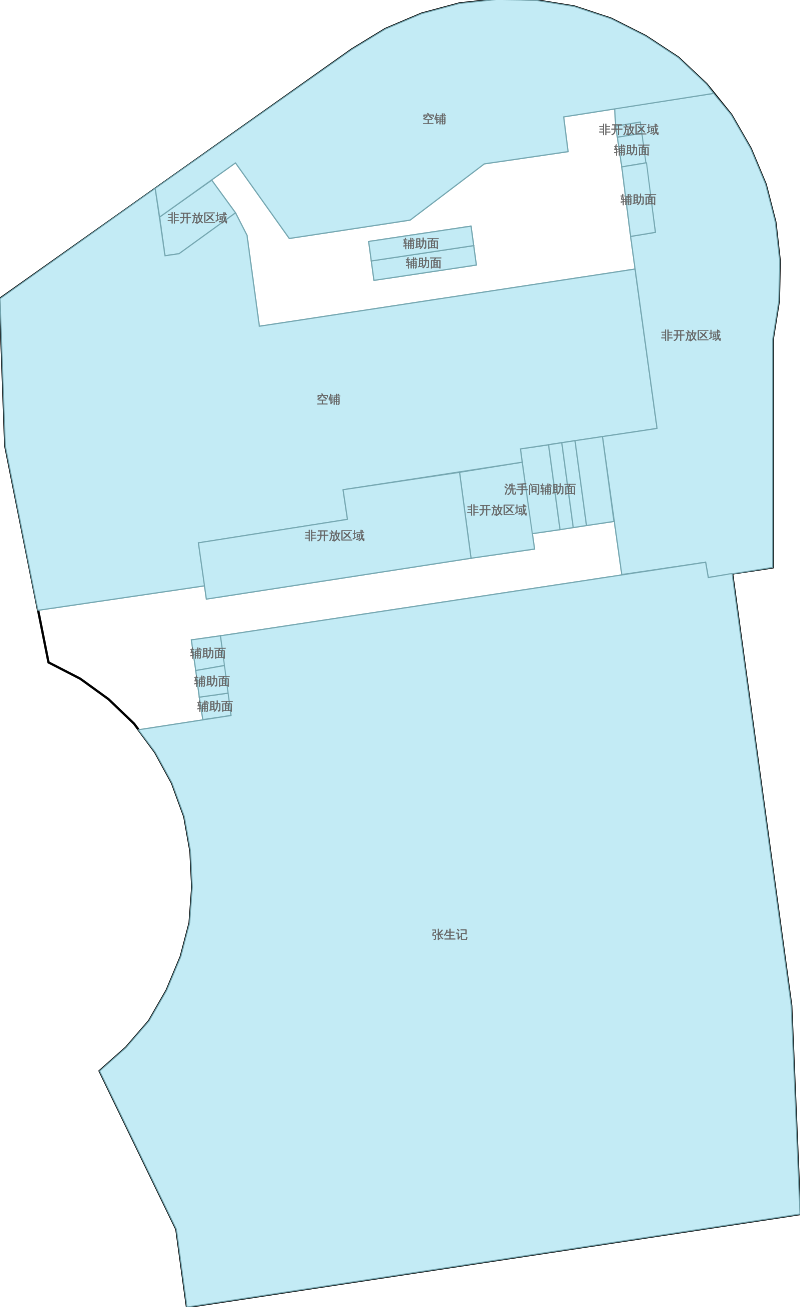

In [23]:
visualize_trajectory(trajectory[:, 1:], floor_plan_filename, width_meter, height_meter-6, title, mode='lines + markers + text', show=True)

In [ ]:
train = 